# Clustering

=> Veriyi, benzerliklerine gore kumelendirme

In [166]:
#pip install yellowbrick

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [211]:
#Models
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage

In [169]:
km = KMeans()
vis = KElbowVisualizer(km,k=(2,10))

In [170]:
df = pd.read_excel('cars.xls')

In [171]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


### Remember this.
- Regression: r2 RMSE
- Classification Accuary: F1 Score Classification Report and Confusion Matrix
- Clustering Siloutte Score

In [173]:
x = df[['Price','Mileage','Cylinder']]

In [174]:
x.head()

,Price,Mileage,Cylinder
0,17314.103129,8221,6
1,17542.036083,9135,6
2,16218.847862,13196,6
3,16336.913140,16342,6
4,16339.170324,19832,6


In [175]:
model = KMeans(4) 
# Parametre, kaç küme oluşacağını bildiriyor.

In [176]:
model = model.fit(x)

In [177]:
forecast = model.predict(x)

In [178]:
forecast

array([0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 2, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 2, 2, 2, 3,
       3, 2, 3, 3, 0, 0, 0, 0, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,

In [179]:
x['cluster'] = forecast

In [180]:
x.head()

,Price,Mileage,Cylinder,cluster
0,17314.103129,8221,6,0
1,17542.036083,9135,6,0
2,16218.847862,13196,6,0
3,16336.913140,16342,6,0
4,16339.170324,19832,6,3


In [181]:
silhouette_score(x,forecast)

0.4099937970904043

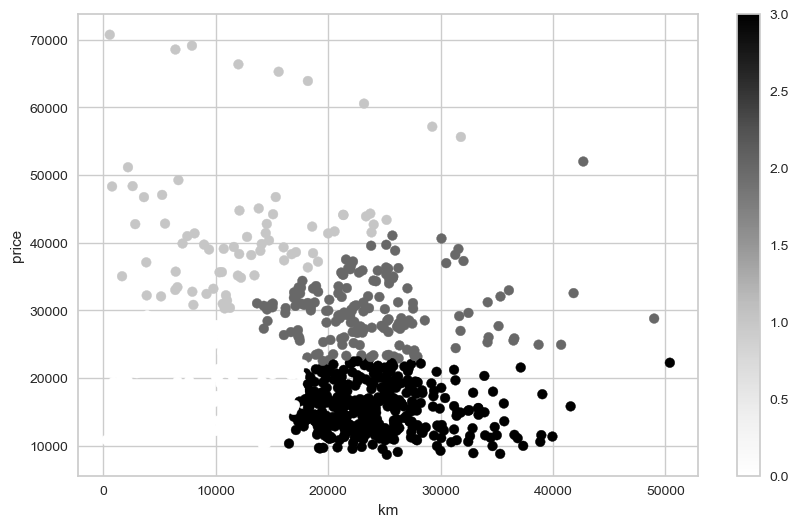

In [182]:
plt.figure(figsize = (10,6))
plt.scatter(x.Mileage,x.Price, c=forecast)
plt.colorbar();

#labels
plt.xlabel('km')
plt.ylabel('price');

In [183]:
#wcss within cluster sum of squares

wcss=[]
ss=[]

for i in range(2,10):
    model=KMeans(i)
    model.fit(x)
    tahmin = model.predict(x)
    ss1=silhouette_score(x, tahmin)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)

0.45104088852038465
0.40339248650337484
0.41407186659935574
0.3531157959748335
0.36091548944788354
0.35708168635359705
0.35340822301979496
0.3223165129208006


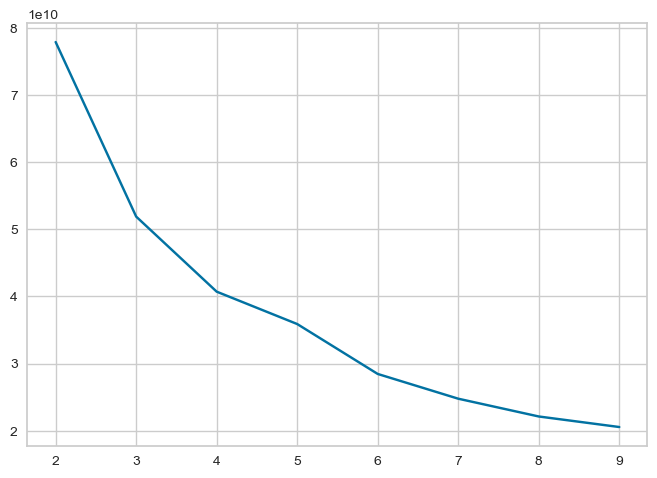

In [184]:
plt.plot(range(2,10),wcss);

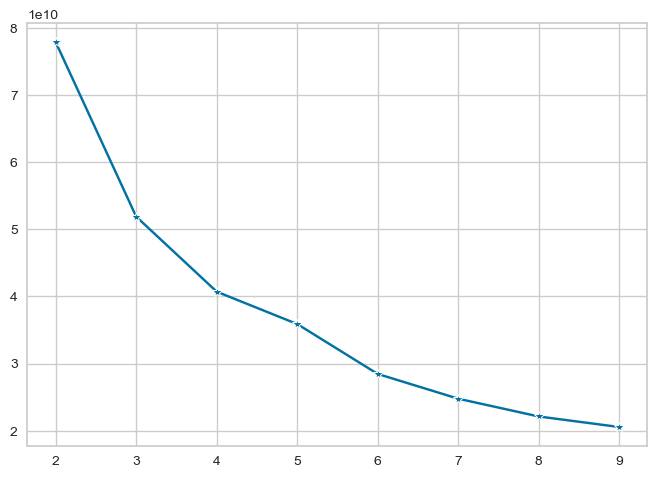

In [185]:
sns.lineplot(x = range(2,10),y=wcss, marker='*');

#### Yellowbrick

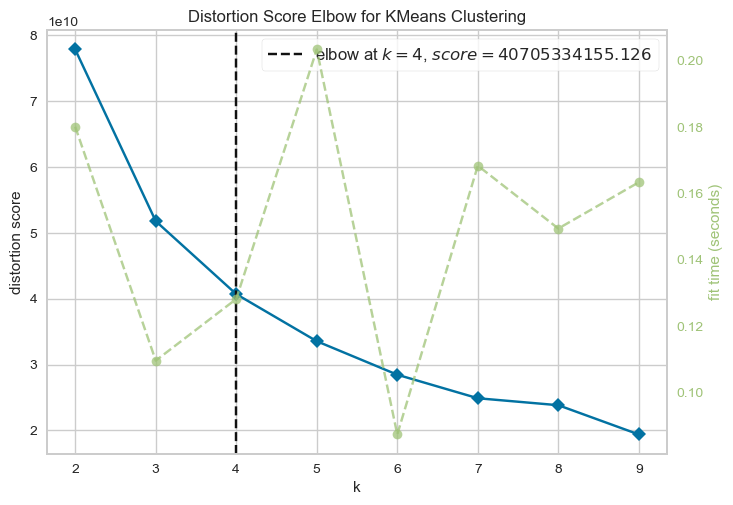

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [187]:
vis.fit(x)
vis.show()

#### Hierachical Clustering

In [218]:
data = linkage(x, method='ward',metric='euclidean')

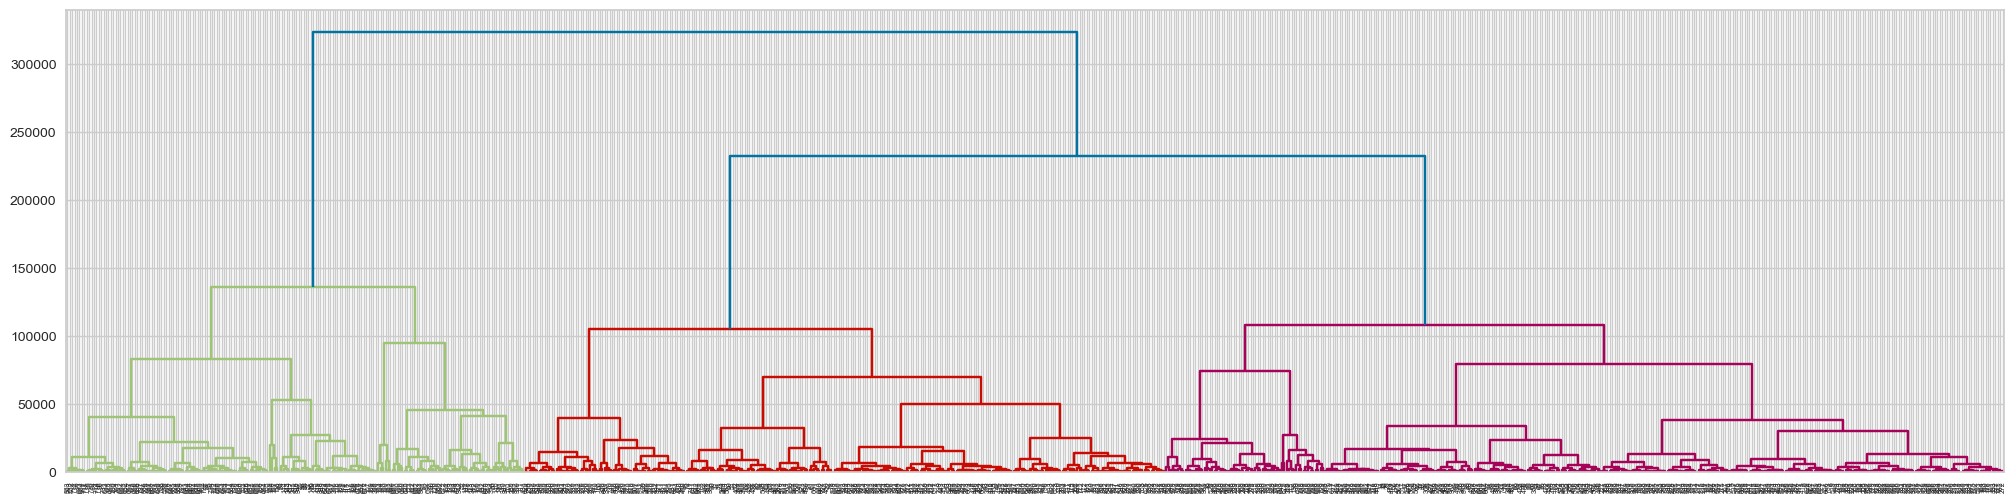

In [224]:
plt.figure(figsize=(25,6))
dendrogram(data);

### Billionaires

In [233]:
df = pd.read_csv('Billionaires.csv')

In [235]:
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


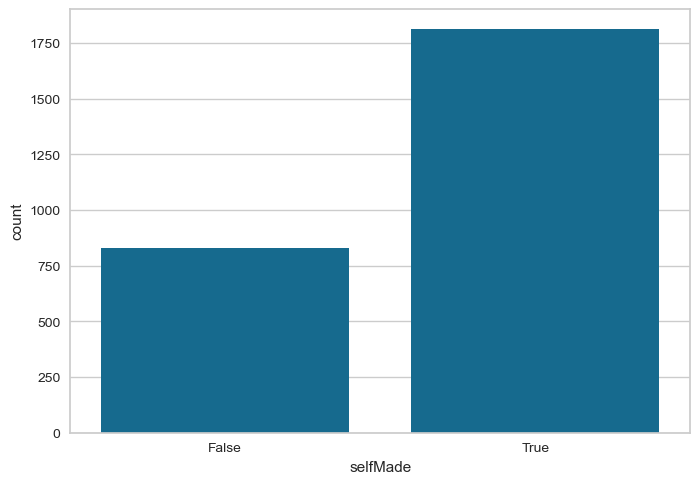

In [239]:
sns.countplot(x = df['selfMade']);

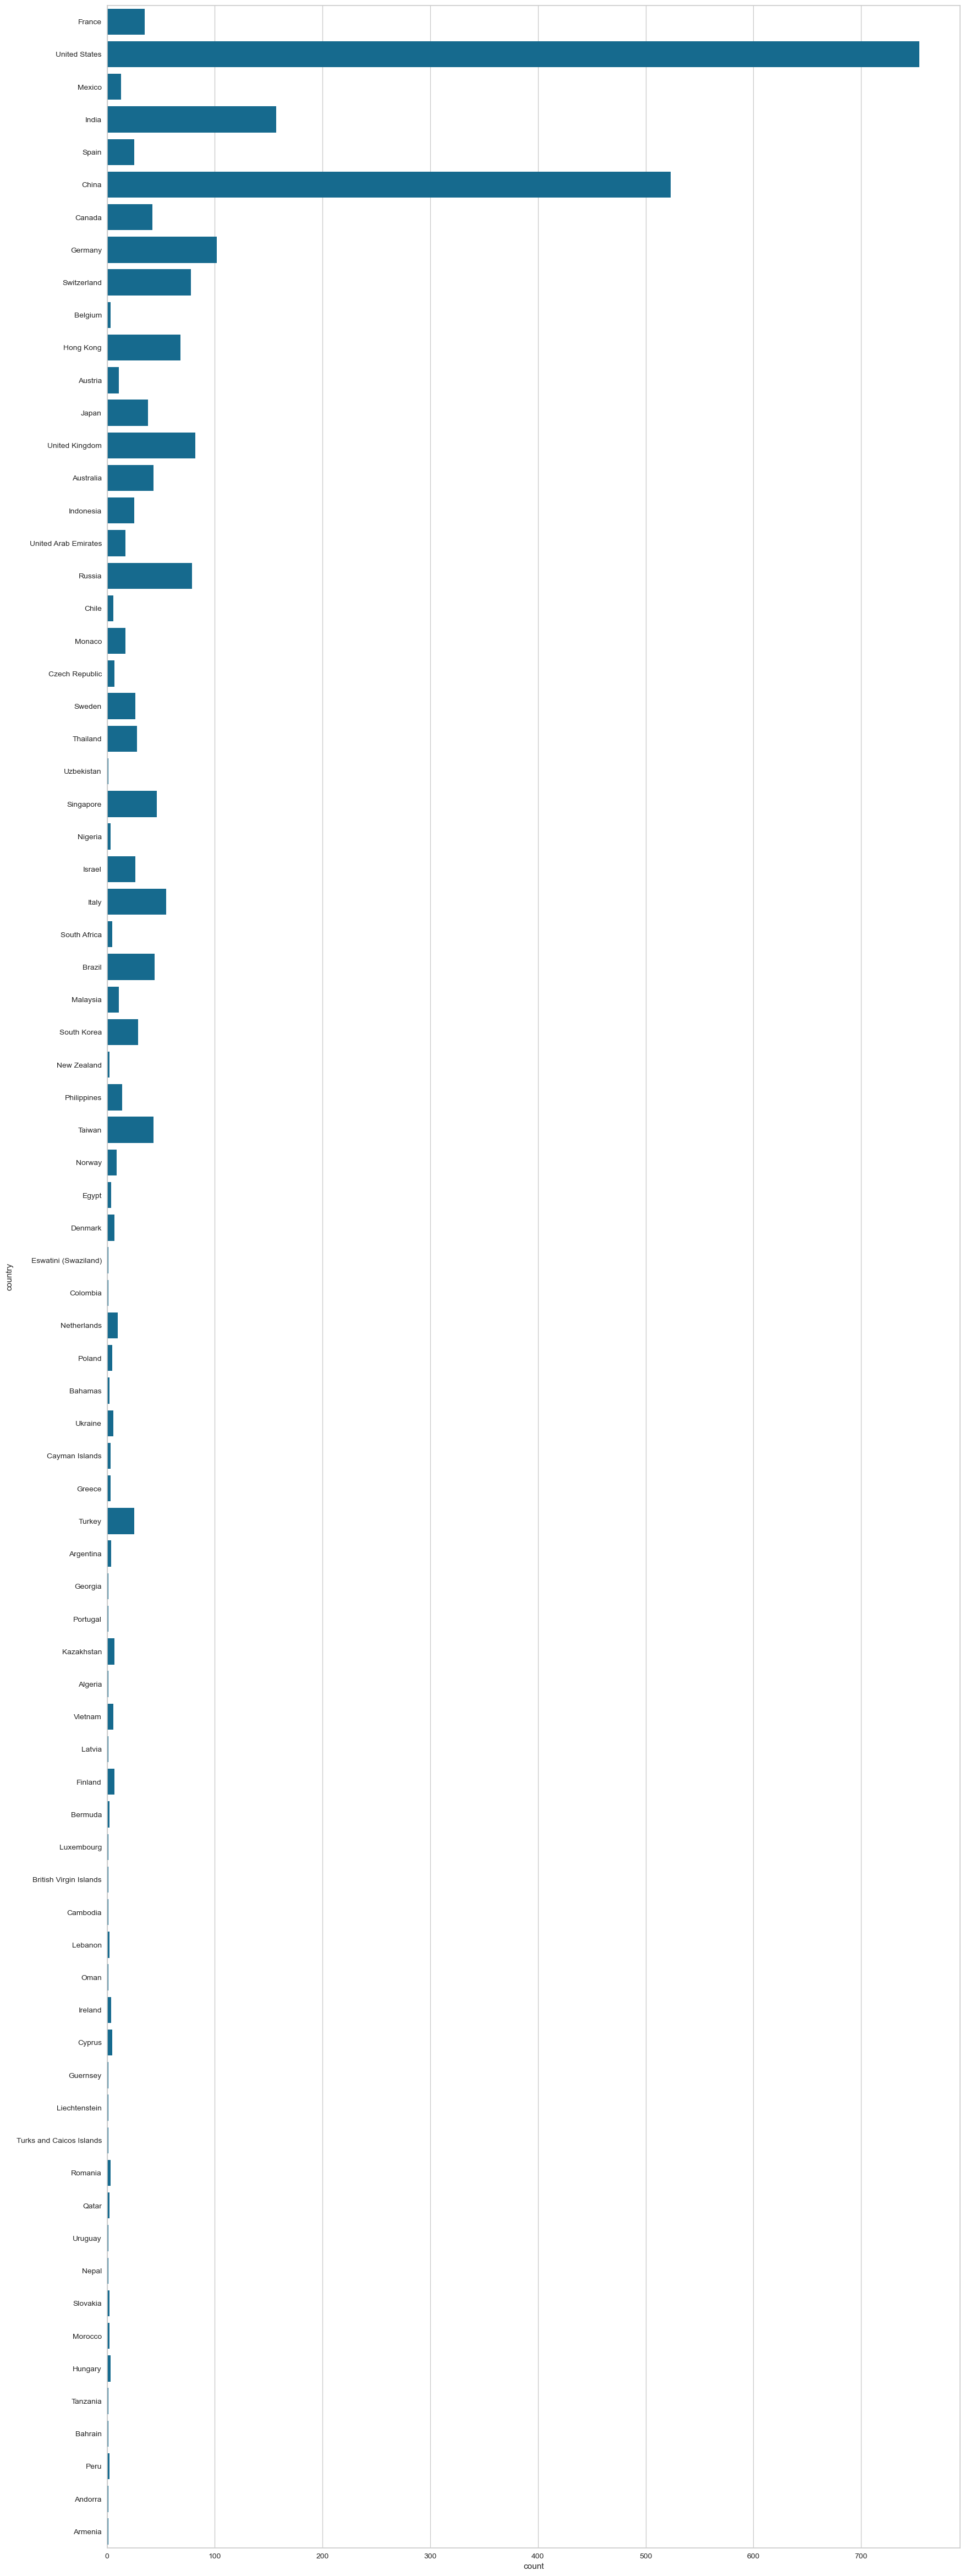

In [243]:
plt.figure(figsize=(20,60))
sns.countplot(y = df['country']);

In [255]:
new_df = df['country'].value_counts().sort_values(ascending=False)

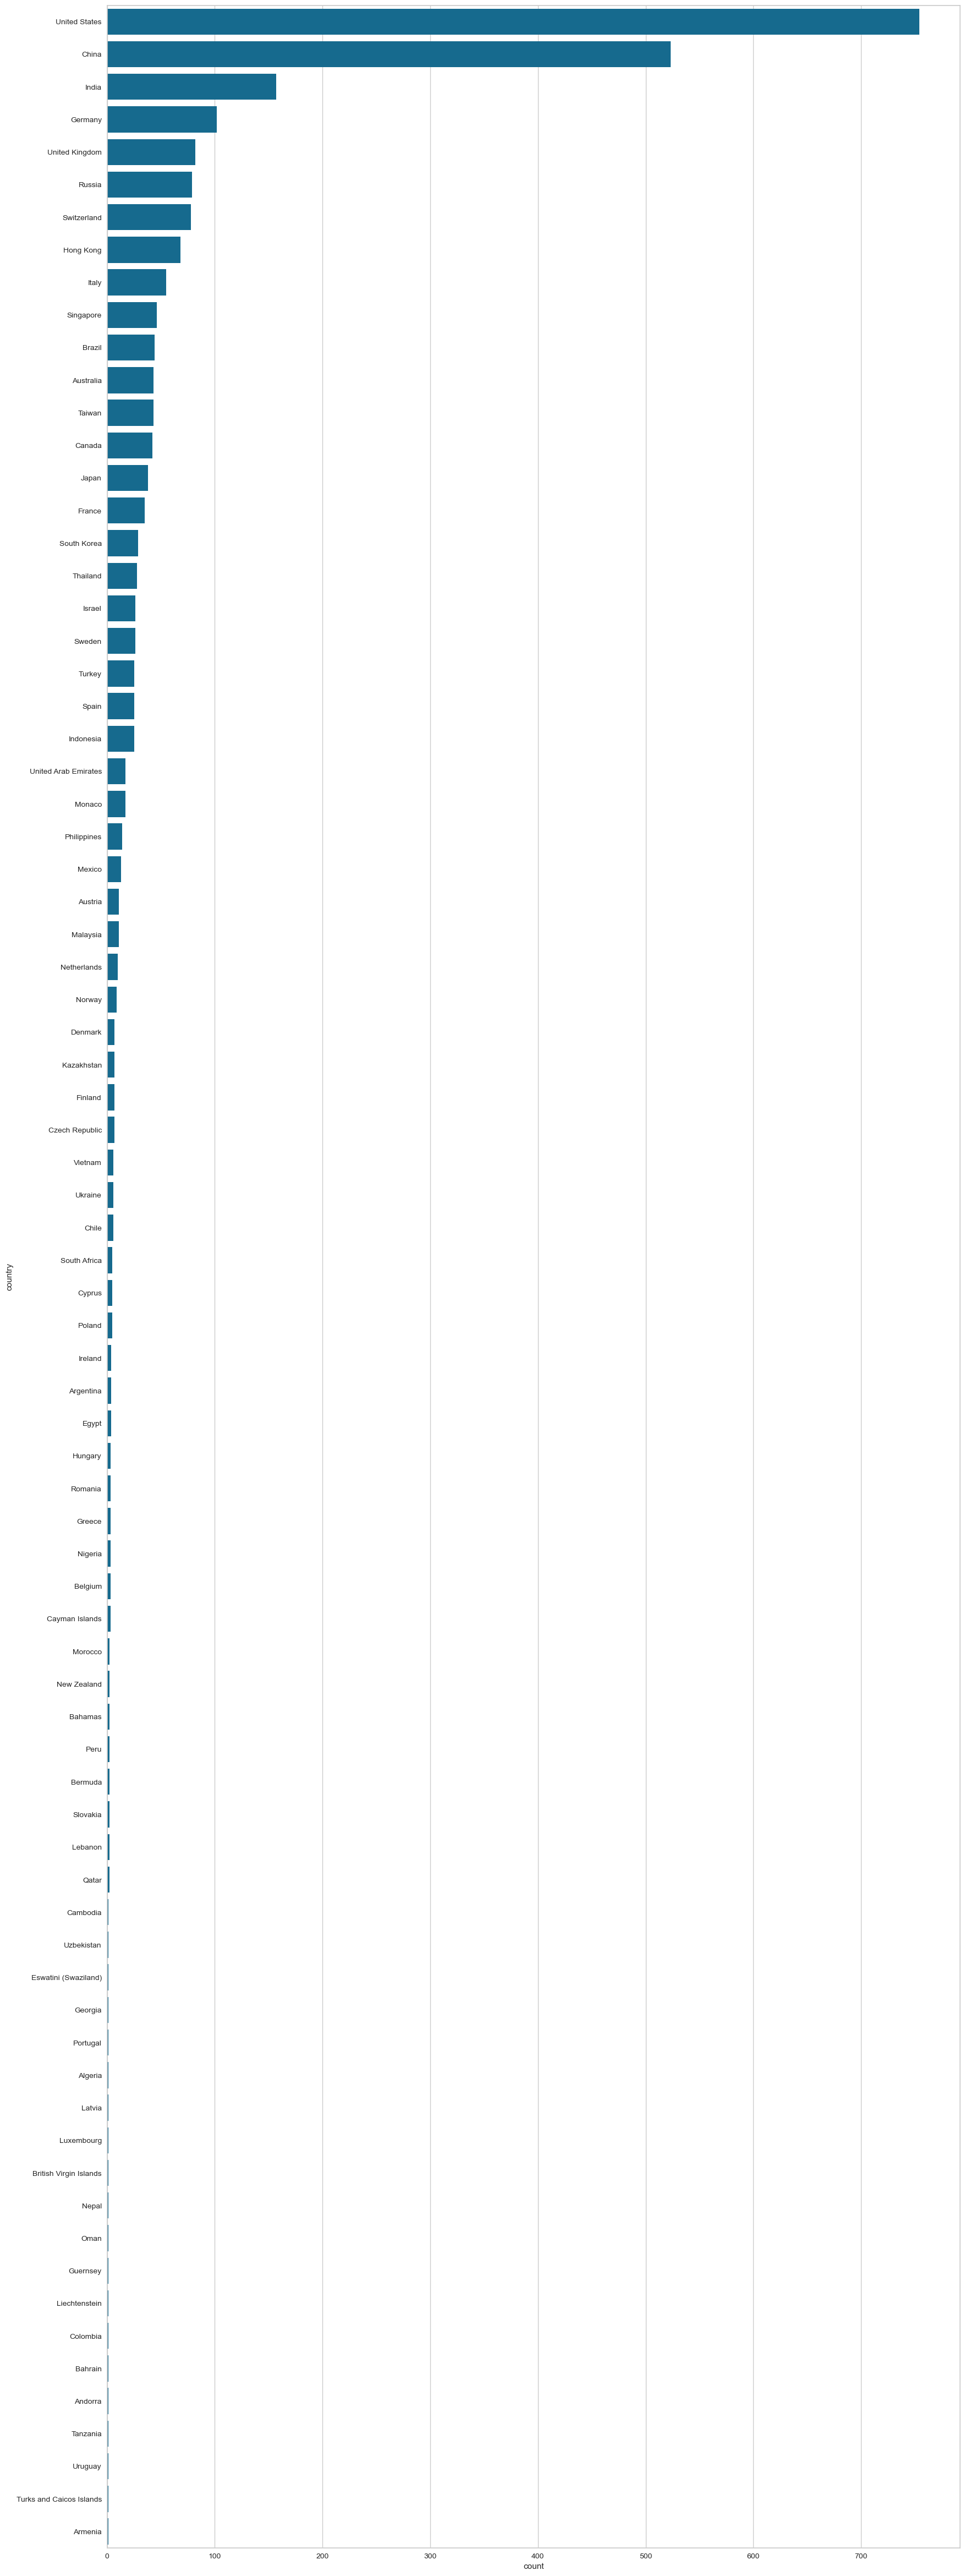

In [257]:
plt.figure(figsize=(20,60))
sns.countplot(y = df['country'], order=new_df.index);

In [263]:
tr = df[df['country'] == 'Turkey']

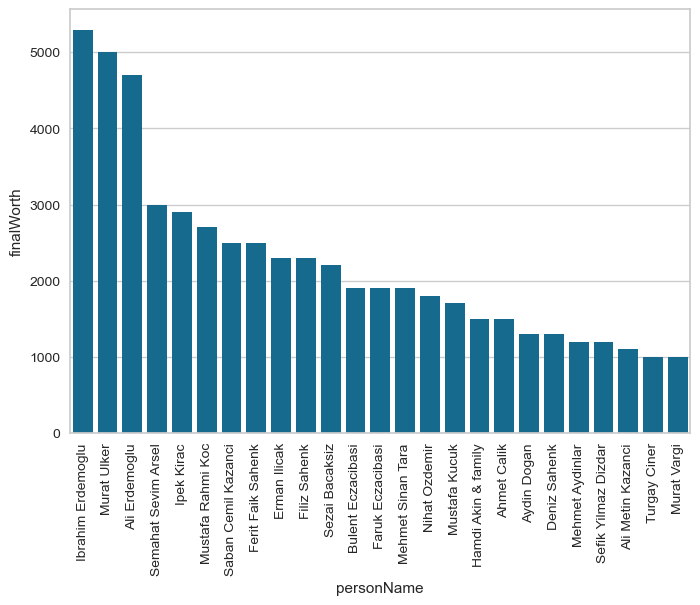

In [279]:
sns.barplot(x = tr['personName'], y=tr['finalWorth'])
plt.xticks(rotation=90);

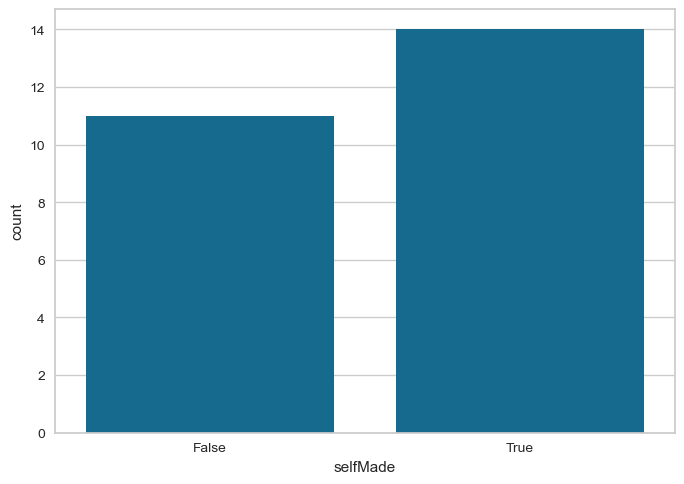

In [267]:
sns.countplot(x = tr['selfMade']);

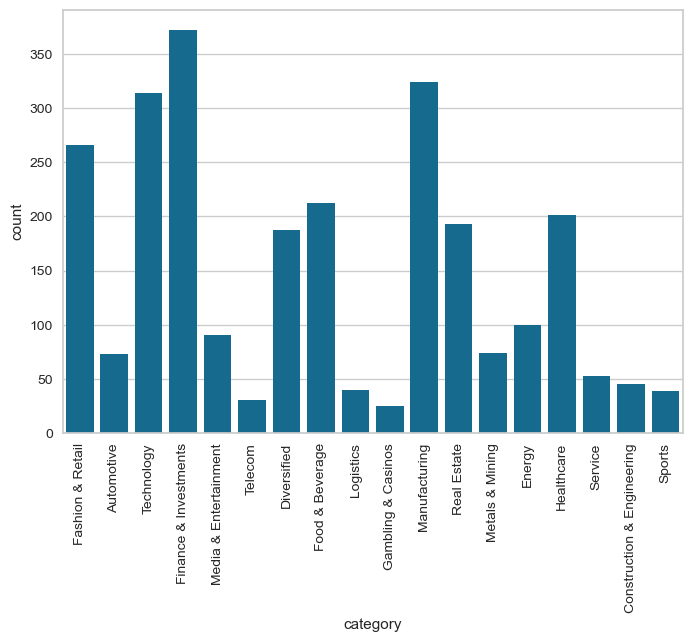

In [285]:
sns.countplot(x = df['category'])
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='gender', ylabel='count'>

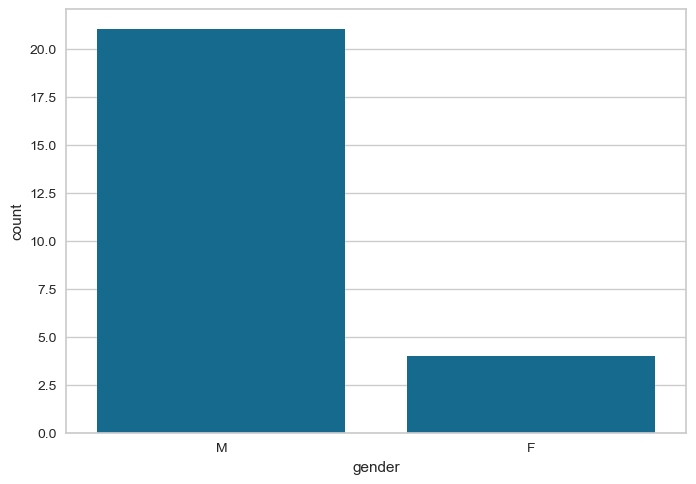

In [289]:
sns.countplot(x = tr['gender'])